This notebook is part of the Machine Learning class by Maximilien Burdin de Saint Martin

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">t - SNE</div>



<i>Représenter dans le plan un jeu de données multidimensionnel</i>

Le plan du cours s'inspire des travaux de Chris Olah et Shan Carter. Visible à ce [lien](https://distill.pub/2016/misread-tsne/).

Le code de t-sne utilisé est une version adaptée d'un exemple trouvé sur le [site internet](https://lvdmaaten.github.io/tsne/) du développeur du t-SNE: Laurens van der Maaten.



1. [Notion de perplexité](#sec1)
2. [Distance entre les clusters](#sec2)
3. [Taille des clusters](#sec3)
4. [Attention au bruit !](#sec4)
5. [Différentes représentations pour un même jeu de données](#sec5)
6. [Exemples d'utilisation](#sec6)
7. [Algorithme](#sec7)
8. [Application au MNIST](#sec8)

<i>Introduction</i>

Cette méthode permet de réduire la dimension d'un jeu de données pour pouvoir le représenter simplement. Elle a été introduite en 2008 par van der Maaten et Hinton. La t-SNE est très répandue en machine learning. Cependant les représentation dont elle est capable peuvent induire des erreurs d'interpretation. Ce notebook a été écrit pour pouvoir prendre en main simplement la méthode, et éviter les erreurs de lecture.

- L'algorithme va représenter dans le plan un jeu de données de dimension élevée. Il est non linéaire, et les opérations ne seront pas les mêmes dans toutes les régions du plan. Les mesures d'espacement entre deux points dépendent donc de la région de ces deux points.
- Un paramètre majeur du code est la "perplexité". On peut l'assimiler au nombre de points voisins d'un point du jeu de données. Il a une très forte influence sur la représentation du jeu de données.

In [1]:
import numpy as np
from random import *
import pylab
import tsne
import math
%matplotlib inline

# <a id="sec1"></a> 1. Notion de Perplexité
Le t-SNE a son "Hello-world" ! Il s'agit de deux clusters de points en deux dimensions:

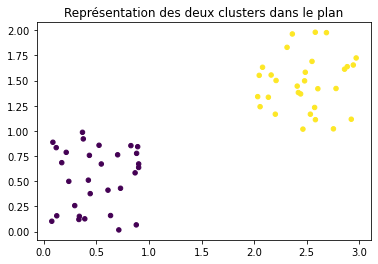

In [32]:
# Creation of the 2 dimension data set:
set_size=60
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/2)):
    data_set[i,0]=random()
    data_set[i,1]=random()
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/2), set_size):
    data_set[i,0]=random() + 2
    data_set[i,1]=random() + 1
    data_label[i]=2
pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des deux clusters dans le plan")
pylab.show()


<div class="alert alert-warning">
    
**Exercice: Essayez différentes valeurs de perplexité!**
    La fonction suivante permet de visualiser une transformation t-SNE sur un jeu de données. Par défaut nous utiliserons les données créées précédemment. La perplexité prend couramment des valeurs entières comprises entre 5 et 50. N'hésitez pas à aller de 2 à 100 dans vos tests. Il suffit simplement de relancer la case de code suivante après avoir modifié la variable perplexité.
</div>

Computing pairwise distances...
Computing P-values for point 0 of 60...
Mean value of sigma: 0.959502


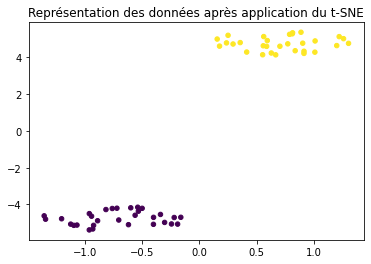

In [33]:
# Visualise results
perplexity_set_by_user = 30

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, perplexity=perplexity_set_by_user, plot=True, labels=data_label)

Comme vous avez pu le constater le t-SNE est très sensible à cette notion de perplexité. Cette méthode ne propose pas une visualisation unique parfaite. La représentation d'un jeu de données peut prendre plusieurs formes très différentes les unes des autres

<div class="alert alert-warning">
    
**Exercice: Essayez différentes valeurs d'itération**
    Par défaut la boucle principale du programme fait 5000 itérations. Nous verrons plus loin cette structure dans les détails.
    Essayez d'appliquer l'algorithme sur le jeu de données pour un nombre plus faible d'itérations.
    Pour cela il suffit de relancer la case suivante après avoir modifié la variable max_iter.
</div>

Computing pairwise distances...
Computing P-values for point 0 of 60...
Mean value of sigma: 0.993819


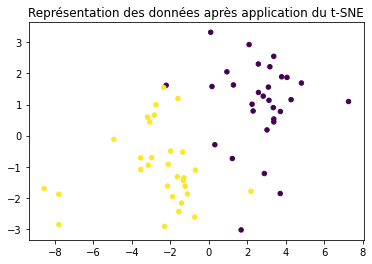

In [5]:
# Visualise results
perplexity_set_by_user = 30
max_iter_set_by_user=10

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

Combien faut il d'iterations pour arriver à une représentation stable dans notre exemple ?

# <a id="sec1"></a> 2. Distance entre les clusters
Nous allons constater dans cette section à travers différents exemples une caractéristique importante des repésentations t-sne.
On commence par creer un jeu de données de 3 clusters, situés à différente distance les uns des autres.

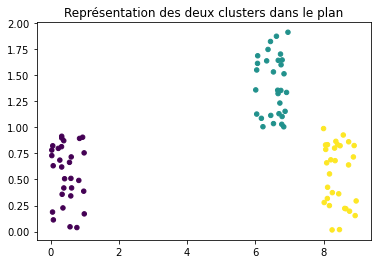

In [10]:
# Creation of the 2 dimension data set:
set_size=90
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/3)):
    data_set[i,0]=random()
    data_set[i,1]=random()
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/3), int(2*set_size/3)):
    data_set[i,0]=random() + 6
    data_set[i,1]=random() + 1
    data_label[i]=2
for i in range (int(2*set_size/3), set_size):
    data_set[i,0]=random() + 8
    data_set[i,1]=random()
    data_label[i]=3
pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des trois clusters dans le plan")
pylab.show()


<div class="alert alert-warning">
    
**Exercice: Appliquer l'algorithme sur le jeu de données**
    Que penser des distances relatives entre les différents clusters ? Sont elles représentatives de la réalité ?
</div>

Computing pairwise distances...
Computing P-values for point 0 of 90...
Mean value of sigma: 1.486888


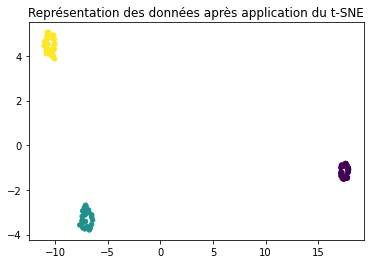

In [14]:
# Visualise results
perplexity_set_by_user = 30
max_iter_set_by_user=1000

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

# <a id="sec1"></a> 3.Distance intra-cluster
Nous avons vu dans la section précédente comment les distances entre les clusters pouvaient induire en erreur.
Interessons nous désormais aux représentations des distances de deux points dans un même cluster.
Nous allons refaire un jeu de données avec des clusters de différentes tailles.

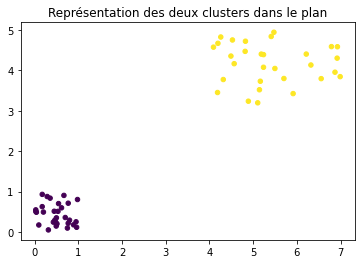

In [17]:
# Creation of the 2 dimension data set:
set_size=60
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/2)):
    data_set[i,0]=random()
    data_set[i,1]=random()
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/2), set_size):
    data_set[i,0]=random()*3 + 4
    data_set[i,1]=random()*2 + 3
    data_label[i]=2
pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des deux clusters dans le plan")
pylab.show()

<div class="alert alert-warning">
    
**Exercice: Appliquer l'algorithme sur le jeu de données**
    Que penser des distances relatives entre les points des différents clusters ? Sont elles représentatives de la réalité ?
</div>

Computing pairwise distances...
Computing P-values for point 0 of 60...
Mean value of sigma: 2.673738


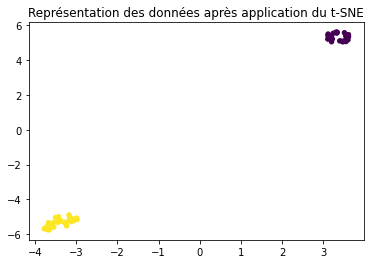

In [19]:
# Visualise results
perplexity_set_by_user = 30
max_iter_set_by_user=1000

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

# <a id="sec1"></a> 4. Attention au bruit !
Un jeu de données random peut faire apparaître des clusters si les paramètres de perplexité et le nombre d'itération sont mal réglés.

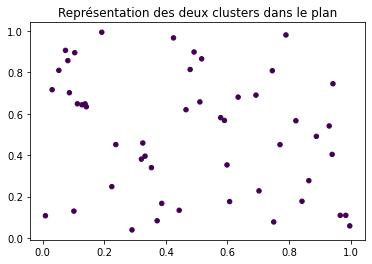

In [20]:
# Creation of the 2 dimension data set:
set_size=50
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])

for i in range(0, set_size):
    data_set[i,0]=random()
    data_set[i,1]=random()
    data_label[i]=1

pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des deux clusters dans le plan")
pylab.show()

<div class="alert alert-warning">
    
**Exercice: Appliquer l'algorithme sur le jeu de données**
    Essayez de faire apparaitre des clusters. Qu'en déduisez vous pour les réglages des paramètres ?
</div>

Computing pairwise distances...
Computing P-values for point 0 of 50...
Mean value of sigma: 0.127949


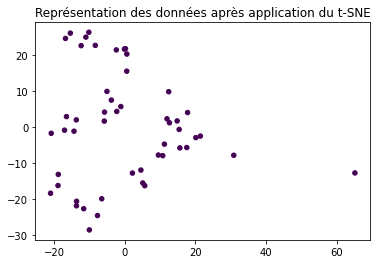

In [25]:
# Visualise results
perplexity_set_by_user = 5
max_iter_set_by_user=100

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

# <a id="sec1"></a> 5. Différentes représentations pour un même jeu de données
Nous verrons dans cette partie que l'algorithme peut proposer plusieurs visualisation différentes d'un même jeu de données. On reprend pour cela un jeu de données avec 3 clusters.

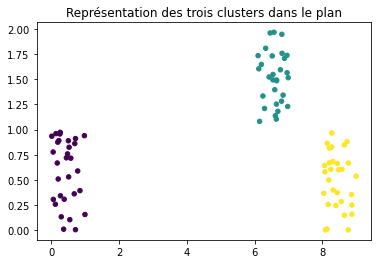

In [27]:
# Creation of the 2 dimension data set:
set_size=90
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/3)):
    data_set[i,0]=random()
    data_set[i,1]=random()
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/3), int(2*set_size/3)):
    data_set[i,0]=random() + 6
    data_set[i,1]=random() + 1
    data_label[i]=2
for i in range (int(2*set_size/3), set_size):
    data_set[i,0]=random() + 8
    data_set[i,1]=random()
    data_label[i]=3
pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des trois clusters dans le plan")
pylab.show()

<div class="alert alert-warning">
    
**Exercice: Appliquer l'algorithme sur le jeu de données**
    Après avoir trouvé les bons paramètres, relancer le code plusieurs fois.
</div>

Computing pairwise distances...
Computing P-values for point 0 of 90...
Mean value of sigma: 0.164947


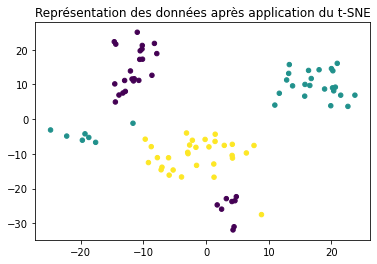

In [30]:
# Visualise results
perplexity_set_by_user = 5
max_iter_set_by_user=100

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

# <a id="sec1"></a> 6. Exemples d'utilisation
Essayons maintenant d'appliquer le code sur des jeux de données ayant une forme particulière !


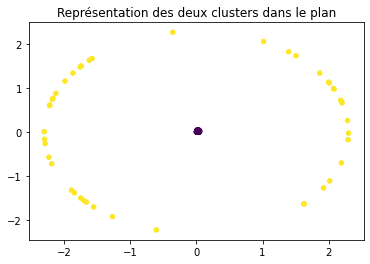

In [63]:
# Creation of the 2 dimension data set:
set_size=90
data_set=np.zeros([set_size,2])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/2)):
    data_set[i,0]=random()/20
    data_set[i,1]=random()/20
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/2), set_size):

    rayon=2.3
    y=random()*rayon*choice([-1, 1])
    x=math.sqrt(rayon*rayon-y*y)*choice([-1, 1])
    data_set[i,0]=x
    data_set[i,1]=y
    data_label[i]=2
pylab.scatter(data_set[:, 0], data_set[:, 1], 20, data_label)
pylab.title("Représentation des deux clusters dans le plan")
pylab.show()


Computing pairwise distances...
Computing P-values for point 0 of 90...
Mean value of sigma: 1.274471


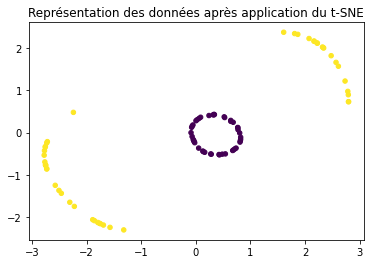

In [64]:
# Visualise results
perplexity_set_by_user=45
max_iter_set_by_user=1000

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=2, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

In [78]:
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

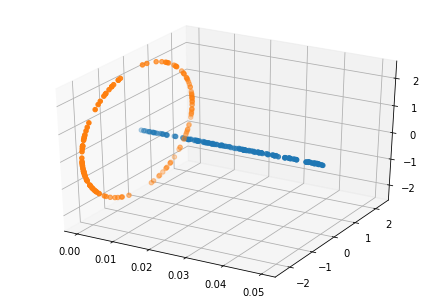

In [89]:
# Creation of the 2 dimension data set:
set_size=300
data_set=np.zeros([set_size,3])
data_label=np.zeros([set_size, ])
# Creation of the first set part
for i in range(0, int(set_size/2)):
    data_set[i,0]=random()/20
    data_set[i,1]=random()/20
    data_set[i,2]=0
    data_label[i]=1
# Creation of the second part
for i in range(int(set_size/2), set_size):

    rayon=2.3
    y=random()*rayon*choice([-1, 1])
    x=math.sqrt(rayon*rayon-y*y)*choice([-1, 1])
    data_set[i, 0]=0
    data_set[i,1]=x
    data_set[i,2]=y
    data_label[i]=2
figure = pyplot.figure()
ax = Axes3D(figure)
ax.scatter(data_set[:int(set_size/2), 0], data_set[:int(set_size/2), 1], data_set[:int(set_size/2), 2], cmap='Green')
ax.scatter(data_set[int(set_size/2):, 0], data_set[int(set_size/2):, 1], data_set[int(set_size/2):, 2], cmap='Orange')



Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 0.496030


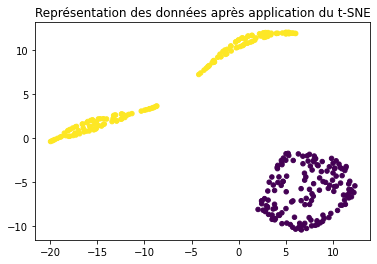

In [90]:
# Visualise results
perplexity_set_by_user=45
max_iter_set_by_user=1000

_=tsne.tsne(X=data_set, no_dims=2, initial_dims=3, 
            perplexity=perplexity_set_by_user, plot=True, 
            labels=data_label, max_iter=max_iter_set_by_user)

# <a id="sec1"></a> 7. Algorithme
Dans cette partie nous allons rentrer plus en détails dans l'algorithme même. 

Nous trouverons 4 paramètres permettant de configurer le code:
- la perplexité, déjà évoquée
- le nombre d'itérations
- le taux d'apprentissage (~500 par défaut, poids pour modifier les variables à chaque itération)
- le momentum (sera détaillé plus loin)

La première étape est le calcul d'une matrice de similarité entre les points. Elle est basée sur une approche probabiliste. Chaque terme de la matrice est la probabilité qu'un point soit voisin d'un autre. Pour ce faire les points ont chacun un espace de voisinage construit sur une loi gaussienne centrée sur le point. Il y a une loi par point. La valeur de la variance sigma est nécessaire dans le calcul.

Ce qui donne la formule : (probabilité que j soit voisin de i)

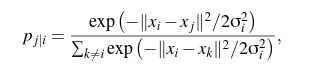

Voici ce que donne le code:

Cette matrice P sera constante au cours du déroulement du t-SNE. En effet l'espace de départ est figé.

Il faut ensuite calculer la même matrice pour les projections dans le plan de tous les points du data-set. 
Cette matrice sera recalculée à chaque itération. 

Equation 4: 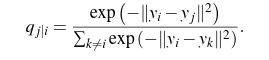

Voici le code en pratique: 

- Y correspond aux coordonnées des points du jeu de données dans le plan. Ces coordonnées sont susceptibles de changer à chaque itération.

Il nous faut ensuite une fonction de cout. La méthode utilisée est la "Kullback-Leibler divergence". En voici l'expression mathématiques:
- La valeur du cout sera notée C.

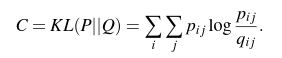

Le t-SNE va minimiser cette fonction par une descente de gradient.

Equation 5: 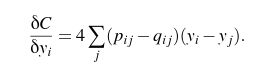

En pratique voici comment est calculé le cout:

Fonction qui permet de modifier les coordonées Y des points après l'évaluation du cout:

<div class="alert alert-success">
    
**Momentum**
Le momentum permet de faire varier Y plus fortement au début des iterations qu'à la fin. Cette technique est très populaire en machine learning pour faire converger plus rapidement du code.
</div>

Pour résumer voici le pseudo-code du programme:
    
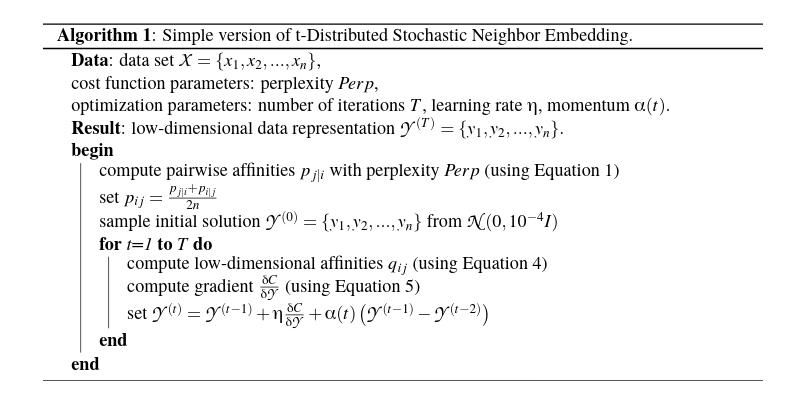

# <a id="sec1"></a> 7. Application au MNIST
Le jeu de données MNIST est très connu comme exemple dans l'univers du Machine Learning. Il s'agit d'une collection de différents chiffres tracés manuellement. 
Nous avons 2500 chiffres différents dans notre data-base, répartis en 9 clusters différents. Un chiffre a une dimension 50. Nous allons ici réduire la dimension de ce jeu de données pour pouvoir le visualiser dans le plan.

Preprocessing the data using PCA...
pca new dim is (2500, 50)
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.646614


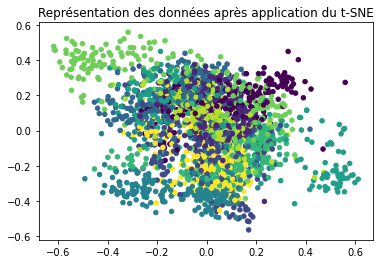

In [5]:
data_set = np.loadtxt("mnist2500_X.txt")
data_label = np.loadtxt("mnist2500_labels.txt")

Y=tsne.tsne(X=data_set, no_dims=2, initial_dims=50, 
            perplexity=35, plot=True, 
            labels=data_label, max_iter=10)